In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits

In [3]:
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

In [4]:
digit = load_digits()

(1797, 64)


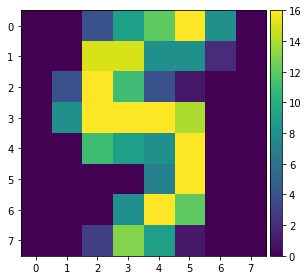

In [9]:
print(digit.data.shape)

imshow(digit.images[1700])

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(digit.data, digit.target, random_state = 42)

from sklearn.metrics import classification_report, confusion_matrix, f1_score

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.95      0.97        39
           2       1.00      1.00      1.00        38
           3       0.93      1.00      0.97        43
           4       1.00      0.98      0.99        56
           5       0.98      0.95      0.97        61
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.96      0.98      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

0.9755046304692631


<AxesSubplot:>

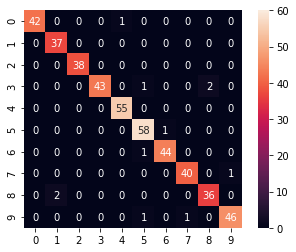

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
y_pred_rfc = rfc.predict(xtest)

print(classification_report(y_pred_rfc, ytest))
print(f1_score(ytest,y_pred_rfc, average='macro'))

sns.heatmap(confusion_matrix(ytest,y_pred_rfc),vmax = 60, annot =True, square=True )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.97      0.97      0.97        38
           9       0.98      0.98      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

0.9845472771479151


<AxesSubplot:>

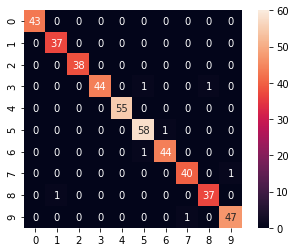

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth = 8), n_estimators=200)
abc.fit(xtrain,ytrain)
y_pred_abc = abc.predict(xtest)

print(classification_report( ytest, y_pred_abc))
print(f1_score(ytest,y_pred_abc, average='macro'))

sns.heatmap(confusion_matrix(ytest,y_pred_abc),vmax = 60, annot =True, square=True )

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37
           2       0.95      1.00      0.97        38
           3       1.00      0.93      0.97        46
           4       0.98      0.98      0.98        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.97      0.96        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      

<AxesSubplot:>

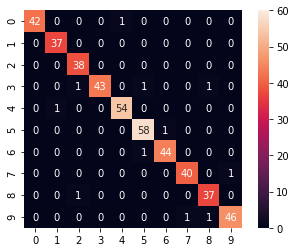

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
y_pred_xgb = xgb.predict(xtest)
print(classification_report( ytest, y_pred_xgb))
print(f1_score(ytest,y_pred_xgb, average='macro'))

sns.heatmap(confusion_matrix(ytest,y_pred_xgb),vmax = 60, annot =True, square=True )

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      0.97      0.99        38
           3       1.00      0.91      0.95        46
           4       0.98      0.98      0.98        55
           5       0.98      0.97      0.97        59
           6       0.96      0.96      0.96        45
           7       0.95      0.98      0.96        41
           8       0.90      1.00      0.95        38
           9       0.96      0.96      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

0.9687053092608876


<AxesSubplot:>

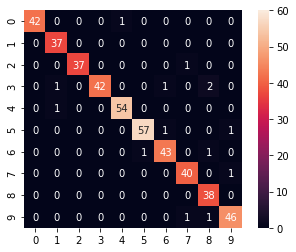

In [34]:

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=5,min_samples_split=140)
gbm.fit(xtrain,ytrain)
y_pred_gbm = gbm.predict(xtest)


print(classification_report( ytest, y_pred_gbm))
print(f1_score(ytest,y_pred_gbm, average='macro'))

sns.heatmap(confusion_matrix(ytest,y_pred_gbm),vmax = 60, annot =True, square=True )

In [41]:
from sklearn.ensemble import VotingClassifier
# #requirement 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=20)),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=20)),
    ('lr',LogisticRegression()) 
]
vc = VotingClassifier(estimators=estimators , voting = 'hard')

vc.fit(xtrain,ytrain)
y_pred_vc = vc.predict(xtest)


vc.score(xtest,ytest)

for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(xtest,ytest))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


rf 0.9577777777777777
svc 0.9866666666666667
knc 0.9933333333333333
abc 0.8688888888888889
lr 0.9733333333333334


0.9866666666666667

rf 0.9688888888888889
svc 0.9866666666666667
knc 0.9933333333333333
abc 0.8555555555555555
lr 0.9733333333333334
